# 항공사 지연 요인 분석 보고서

## 1. 프로젝트 개요
- **분석 목적**: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시
- **데이터 출처**: 항공 운항 지연률 데이터 (총 33,468건)
- **분석 대상 변수**:  
  - `pct_carrier_delay`: 운항사 요인
  - `pct_atc_delay`: 관제 요인
  - `pct_weather_delay`: 기상 요인
  - `airline`: 항공사명

In [5]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("data/airline_stats.csv")  # 파일명은 상황에 맞게 수정

# 기본 정보 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [6]:
# 데이터 샘플 보기
df.head()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


## 2. 데이터 전처리
### 2.1 결측치 탐색
- 결측치가 있는 변수: `pct_carrier_delay`, `pct_atc_delay`, `pct_weather_delay` (각 28건)

### 2.2 결측치 처리
- **방안 A**: 행 제거 (`dropna`)
- **방안 B**: 평균으로 대체 (`fillna`)
- **방안 C**: 항공사별 평균으로 대체 (`groupby().transform()`)

*세 가지 방식의 처리 후 분포 비교 및 통계 요약 포함*


In [7]:
# 결측치 개수
missing_count = df.isnull().sum()

# 전체 대비 결측치 비율(%)
missing_ratio = (missing_count / len(df)) * 100

# 결측치 요약표 출력
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': missing_ratio
}).sort_values(by='Missing Count', ascending=False)

missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
pct_carrier_delay,28,0.083662
pct_atc_delay,28,0.083662
pct_weather_delay,28,0.083662


In [9]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

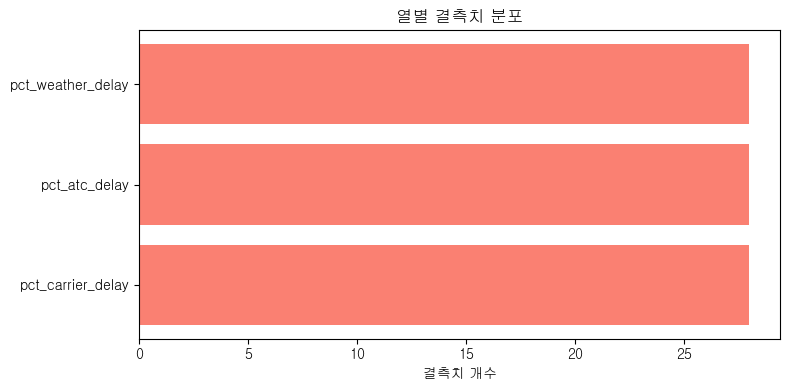

In [10]:
import matplotlib.pyplot as plt

# 결측치 있는 컬럼만 시각화
missing_df = missing_df[missing_df['Missing Count'] > 0]

plt.figure(figsize=(8, 4))
plt.barh(missing_df.index, missing_df['Missing Count'], color='salmon')
plt.xlabel('결측치 개수')
plt.title('열별 결측치 분포')
plt.tight_layout()
plt.show()


In [12]:
# A. 결측값이 있는 행 제거
df_dropna = df.dropna()

# B. 전체 평균으로 결측값 대체
df_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())

# C. 항공사별 평균으로 결측값 대체
df_group_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_group_filled[col] = df_group_filled.groupby('airline')[col]\
                                          .transform(lambda x: x.fillna(x.mean()))



In [13]:
# 수치형 변수만 추출
num_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

# describe 비교
desc_dropna = df_dropna[num_cols].describe().add_prefix('dropna_')
desc_filled = df_filled[num_cols].describe().add_prefix('filled_')
desc_group = df_group_filled[num_cols].describe().add_prefix('group_')

# 세 개 결과를 하나로 합치기
summary_all = pd.concat([desc_dropna, desc_filled, desc_group], axis=1)
import pandas as pd
from IPython.display import display
display(summary_all)


,dropna_pct_carrier_delay,dropna_pct_atc_delay,dropna_pct_weather_delay,filled_pct_carrier_delay,filled_pct_atc_delay,filled_pct_weather_delay,group_pct_carrier_delay,group_pct_atc_delay,group_pct_weather_delay
count,33440.000000,33440.000000,33440.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000
mean,7.041475,5.089962,0.684776,7.041475,5.089962,0.684776,7.041531,5.090018,0.684786
std,4.497596,4.718647,1.073743,4.495714,4.716672,1.073294,4.495773,4.716727,1.073301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000,4.147084,2.148281,0.000000,4.147084,2.148281,0.000000
50%,6.356893,3.900000,0.316002,6.359631,3.903367,0.316655,6.357260,3.903367,0.316655
75%,9.140474,6.630238,0.935161,9.136141,6.625000,0.934579,9.136141,6.626106,0.934579
max,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333


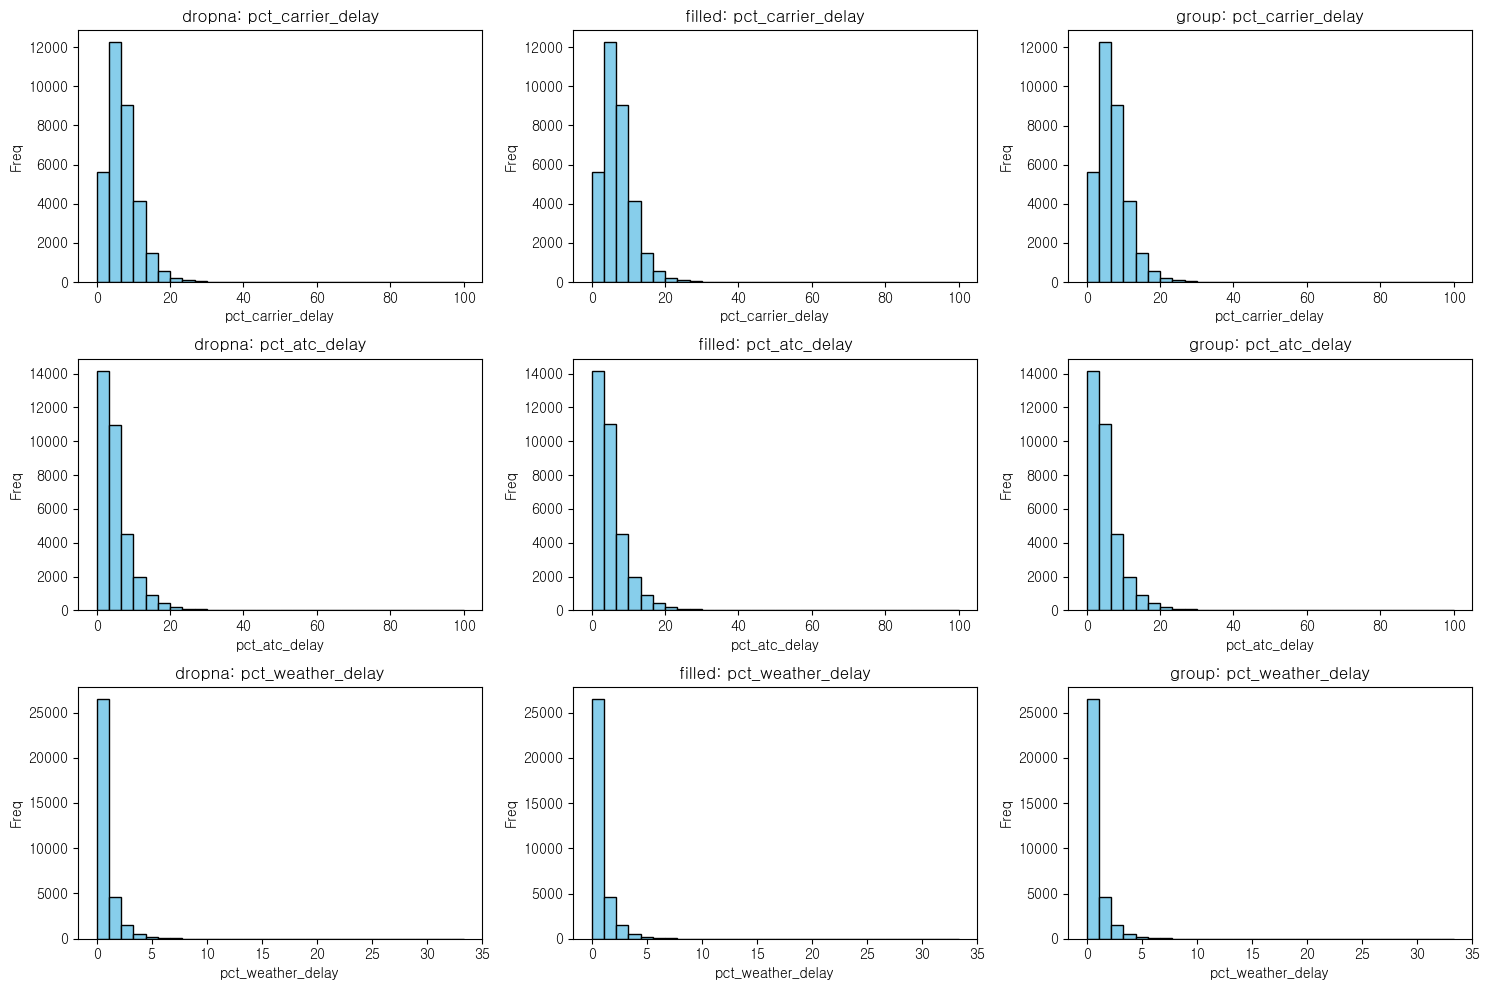

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
datasets = [('dropna', df_dropna), ('filled', df_filled), ('group', df_group_filled)]

for i, col in enumerate(num_cols):
    for j, (label, data) in enumerate(datasets):
        axes[i, j].hist(data[col], bins=30, color='skyblue', edgecolor='black')
        axes[i, j].set_title(f'{label}: {col}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Freq')

plt.tight_layout()
plt.show()


- 평균 대체는 데이터 수를 유지하면서 평균은 같지만 분산이 약간 줄어든다.
- 그룹 평균 대체는 항공사별 특징을 유지하면서 보다 정교한 대체 방식이다.
- dropna는 샘플 수가 줄어들어 외곽값의 영향이 커질 수 있다.

선택된 처리 방식: 항공사별 그룹 평균 대체

결론: 본 분석에서는 항공사별 그룹 평균을 이용한 결측치 보간 방식을 적용하였다. <br>
이는 데이터 손실을 최소화하고 항공사별 지연률 특성을 보존하여, 이후 분석의 정확도를 높일 수 있다.

## 3. 탐색적 데이터 분석 (EDA)
### 3.1 변수별 분포
- 히스토그램 및 상자그림(boxplot) 시각화
- 이상치(outlier) 여부 확인

### 3.2 항공사별 비교
- 항공사별 평균 지연율 비교 (막대그래프)
- 항공사별 상자그림 비교

## 4. 2차원 데이터 분석
### 4.1 공분산 및 상관계수 분석
- 운항사 vs 관제, 기상 요인 간의 연관성 파악

### 4.2 다중공선성 분석
- VIF(Variance Inflation Factor) 계산 및 시각화
- VIF > 10 변수에 대한 해석

## 5. 인사이트 도출
- 운항사 지연률이 높은 항공사는 누구인가?
- 항공사별로 어떤 지연 요인이 더 영향을 미치는가?
- 정책적 개선안 제시

## 6. 결론 및 제언
- 핵심 요약: 데이터 기반 의사결정 가능
- 데이터 활용 방안 및 후속 분석 방향

## 첨부자료
- 사용한 코드 블록
- 데이터 요약 통계표 (`describe()` 결과)
- 참고 문헌 및 출처